# Baseline: CNN

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5216 - accuracy: 0.4444 - val_loss: 1.3057 - val_accuracy: 0.5278
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1775 - accuracy: 0.5817 - val_loss: 1.0841 - val_accuracy: 0.6162
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0273 - accuracy: 0.6361 - val_loss: 0.9857 - val_accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9288 - accuracy: 0.6726 - val_loss: 0.9523 - val_accuracy: 0.6730
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8562 - accuracy: 0.6992 - val_loss: 0.9393 - val_accuracy: 0.6768
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8013 - accuracy: 0.7194 - val_loss: 0.9084 - val_accuracy: 0.6899
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7476 - accuracy: 0.7404 - val_loss: 0.8868 - val_accuracy:

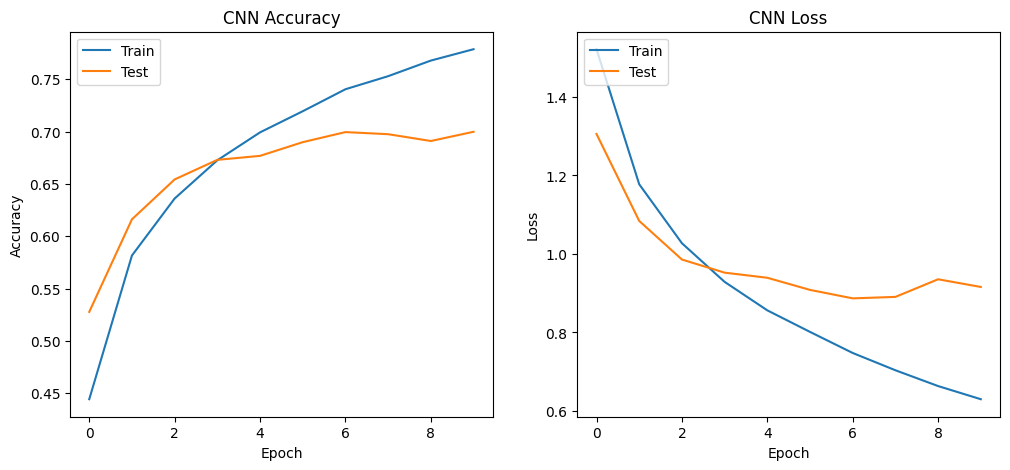

313/313 - 1s - loss: 0.9158 - accuracy: 0.6998 - 573ms/epoch - 2ms/step
Test accuracy: 0.6998000144958496


In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


# Baseline: ResNet50

Epoch 1/50
1563/1563 [==============================] - 18s 9ms/step - loss: 2.2658 - accuracy: 0.1235 - val_loss: 2.1699 - val_accuracy: 0.1794
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2069 - accuracy: 0.1396 - val_loss: 2.1209 - val_accuracy: 0.2030
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1938 - accuracy: 0.1469 - val_loss: 2.1075 - val_accuracy: 0.2078
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1789 - accuracy: 0.1565 - val_loss: 2.0993 - val_accuracy: 0.2344
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1651 - accuracy: 0.1626 - val_loss: 2.0448 - val_accuracy: 0.2506
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1533 - accuracy: 0.1718 - val_loss: 2.0447 - val_accuracy: 0.2804
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1398 - accuracy: 0.1752 - val_loss: 2.0218 - val_ac

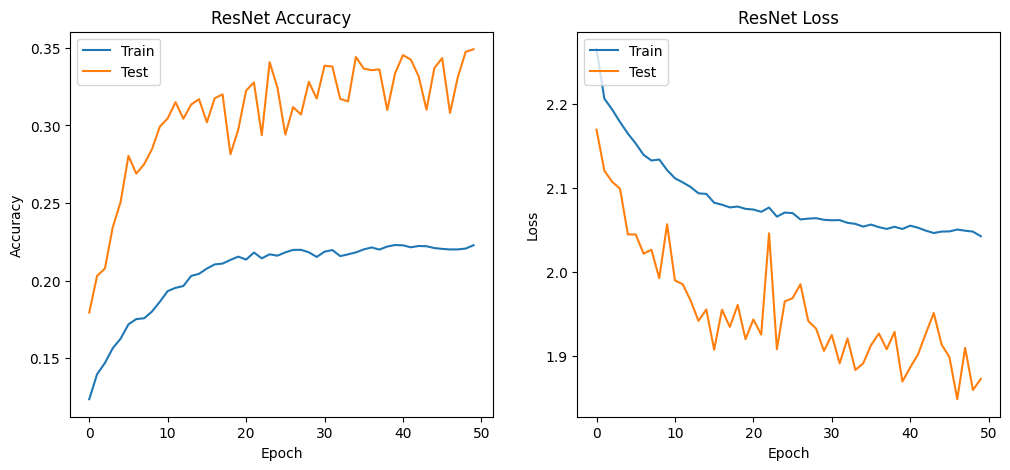

313/313 - 2s - loss: 1.8723 - accuracy: 0.3491 - 2s/epoch - 6ms/step
Test accuracy: 0.3490999937057495


In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


# Method 1: multi-scale convolutional features + dense connectivity + global average pooling

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_72 (Conv2D)          (None, 32, 32, 32)           128       ['input_12[0][0]']            
                                                                                                  
 conv2d_73 (Conv2D)          (None, 32, 32, 32)           896       ['input_12[0][0]']            
                                                                                                  
 conv2d_74 (Conv2D)          (None, 32, 32, 32)           2432      ['input_12[0][0]']            
                                                                                            

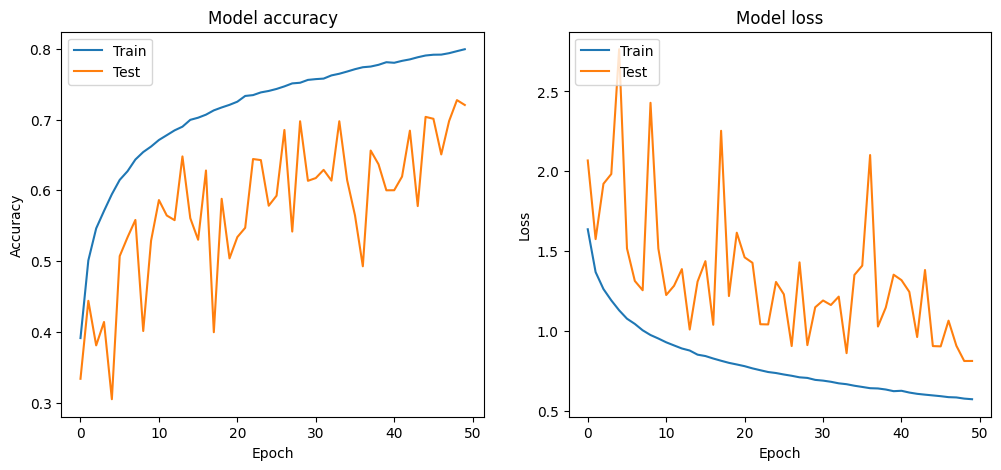

313/313 [==============================] - 1s 3ms/step - loss: 0.8120 - accuracy: 0.7206


[0.8120086193084717, 0.7206000089645386]

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def multi_layer(inputs):
    path1 = layers.Conv2D(32, (1, 1), padding='same', activation='relu')(inputs)
    path2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    path3 = layers.Conv2D(32, (5, 5), padding='same', activation='relu')(inputs)
    concatenated = layers.concatenate([path1, path2, path3], axis=-1)
    return concatenated

def dense_block(inputs, num_convolutions):
    for _ in range(num_convolutions):
        x = layers.BatchNormalization()(inputs)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(32, (3, 3), padding='same')(x)
        inputs = layers.concatenate([inputs, x])
    return inputs

input_img = layers.Input(shape=(32, 32, 3))
ms_features = multi_layer(input_img)
dense_features = dense_block(ms_features, 3)
gap = layers.GlobalAveragePooling2D()(dense_features)
outputs = layers.Dense(10, activation='softmax')(gap)

model = models.Model(inputs=input_img, outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
model.evaluate(x_test, y_test)


# Method 2: convolutional layer + residual blocks + dense connectivity blocks + attention modules + global average pooling

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_86 (Conv2D)          (None, 32, 32, 64)           1792      ['input_14[0][0]']            
                                                                                                  
 batch_normalization_34 (Ba  (None, 32, 32, 64)           256       ['conv2d_86[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_7 (ReLU)              (None, 32, 32, 64)           0         ['batch_normalization_3

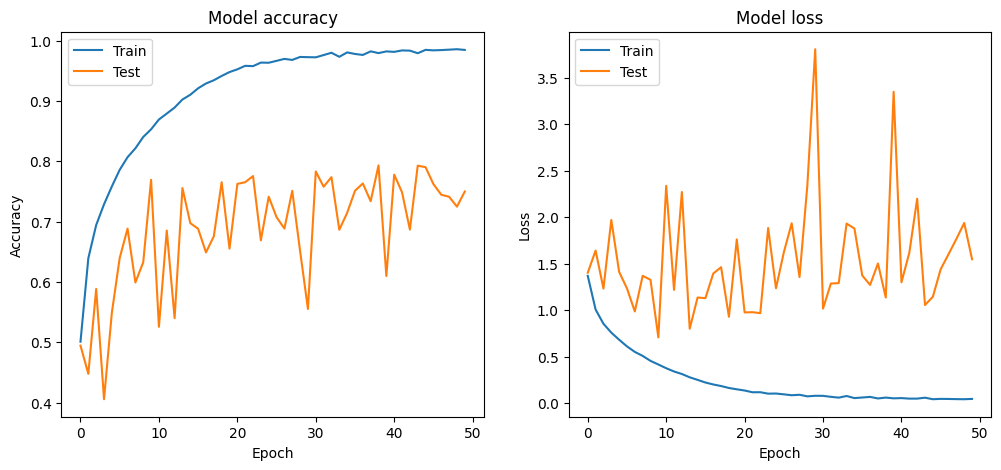

313/313 [==============================] - 2s 3ms/step - loss: 1.5475 - accuracy: 0.7500


[1.5475183725357056, 0.75]

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, Dense, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

def residual_block(x, filters, pool=False):
    shortcut = x
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    if pool:
        x = MaxPooling2D((2, 2))(x)
        shortcut = Conv2D(filters, (1, 1), strides=(2, 2), padding='same')(shortcut)

    x = Add()([x, shortcut])
    return x

def dense_block(x, growth_rate):
    original = x
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(growth_rate, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(growth_rate, (3, 3), padding='same')(x)
    x = tf.concat([original, x], axis=-1)
    return x

def attention_module(x, filters):
    squeeze = GlobalAveragePooling2D()(x)
    squeeze = Dense(filters // 4, activation='relu')(squeeze)
    squeeze = Dense(filters, activation='sigmoid')(squeeze)
    x = tf.multiply(x, squeeze[:, tf.newaxis, tf.newaxis, :])
    return x

def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = residual_block(x, 64)
    x = residual_block(x, 128, pool=True)
    x = dense_block(x, 32)
    x = attention_module(x, 128 + 32)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = build_model(x_train.shape[1:])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
model.evaluate(x_test, y_test)
